### Data Wrangling

In [1]:
#load neccessary python packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
#import all the necessary libraries
import warnings
warnings.filterwarnings("ignore")

from numpy import mean
from numpy import std
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
import matplotlib.pyplot as plt

In [3]:
plt.style.use("ggplot")
plt.rcParams["axes.labelweight"] = "bold"
warnings.simplefilter('ignore')

In [4]:
data = pd.read_csv("train.csv")
data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
data.shape

(617, 58)

In [6]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [8]:
data["EJ"].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [9]:
data["Class"].value_counts()

0    509
1    108
Name: Class, dtype: int64

In [10]:
data.columns = data.columns.str.strip()

In [11]:
data['Class']= data['Class'].astype("category")

In [12]:
data.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [13]:
data.isna().sum()[data.isna().sum() > 0].sort_values(ascending = False)

BQ    60
EL    60
CC     3
CB     2
FS     2
DU     1
FC     1
FL     1
GL     1
dtype: int64

In [14]:
#!pip install missingno

<Axes: >

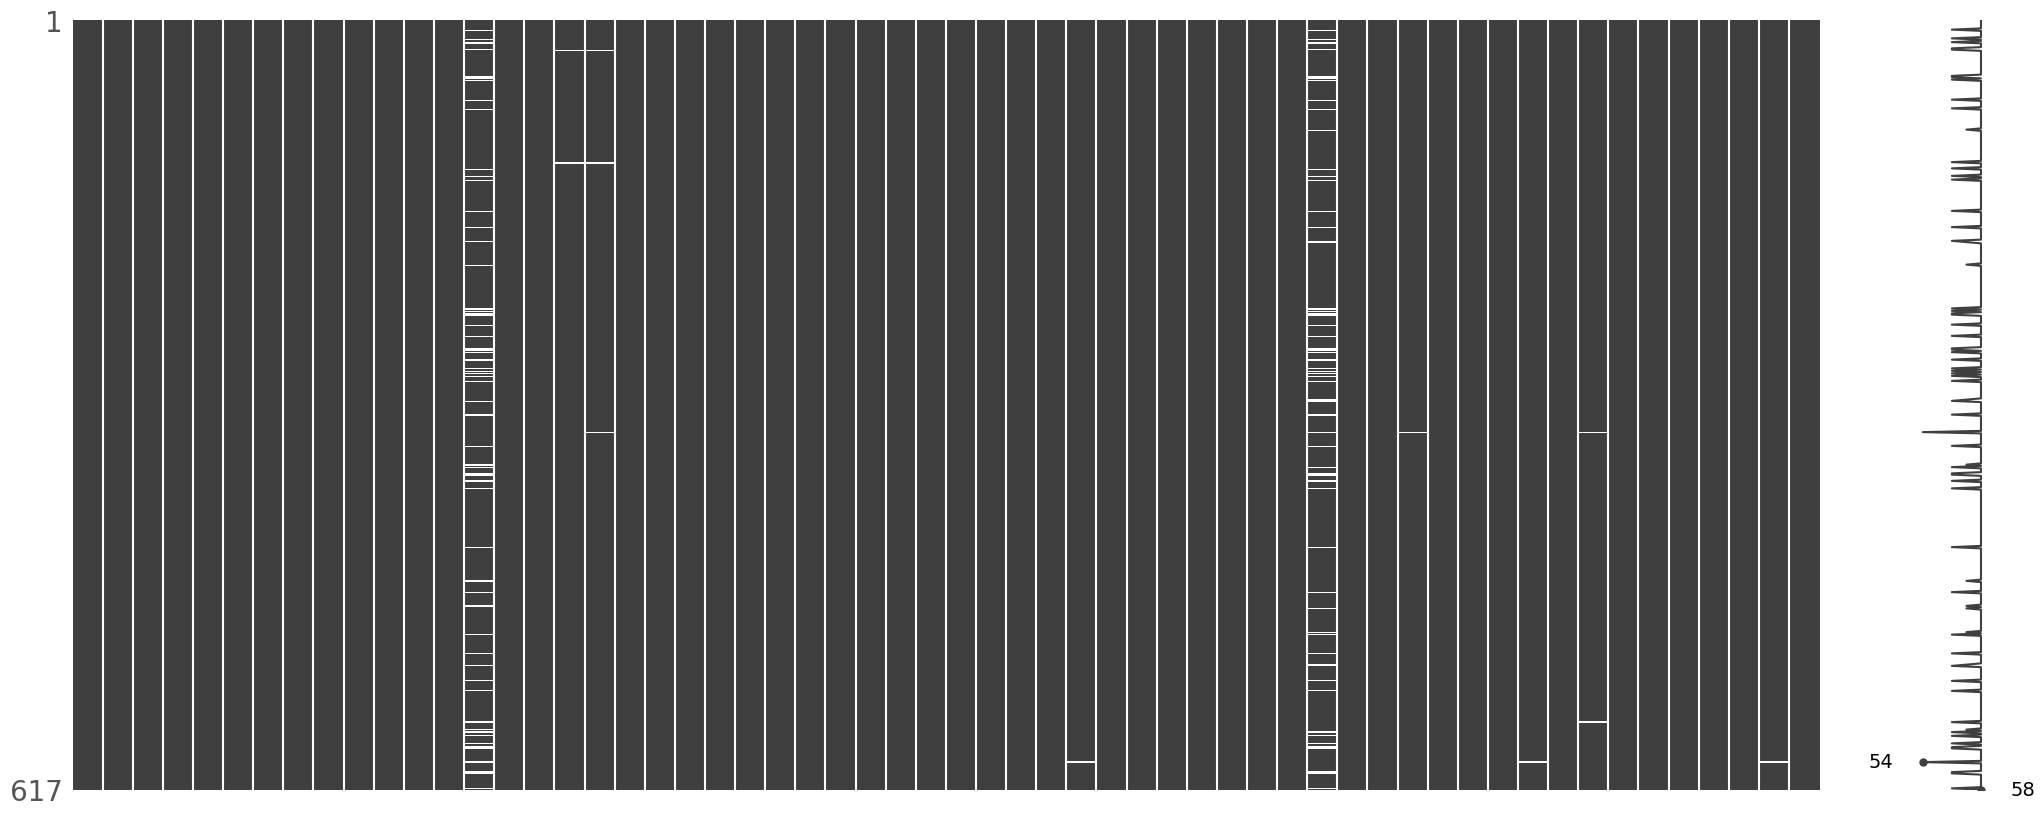

In [15]:
import missingno as msno
msno.matrix(data)

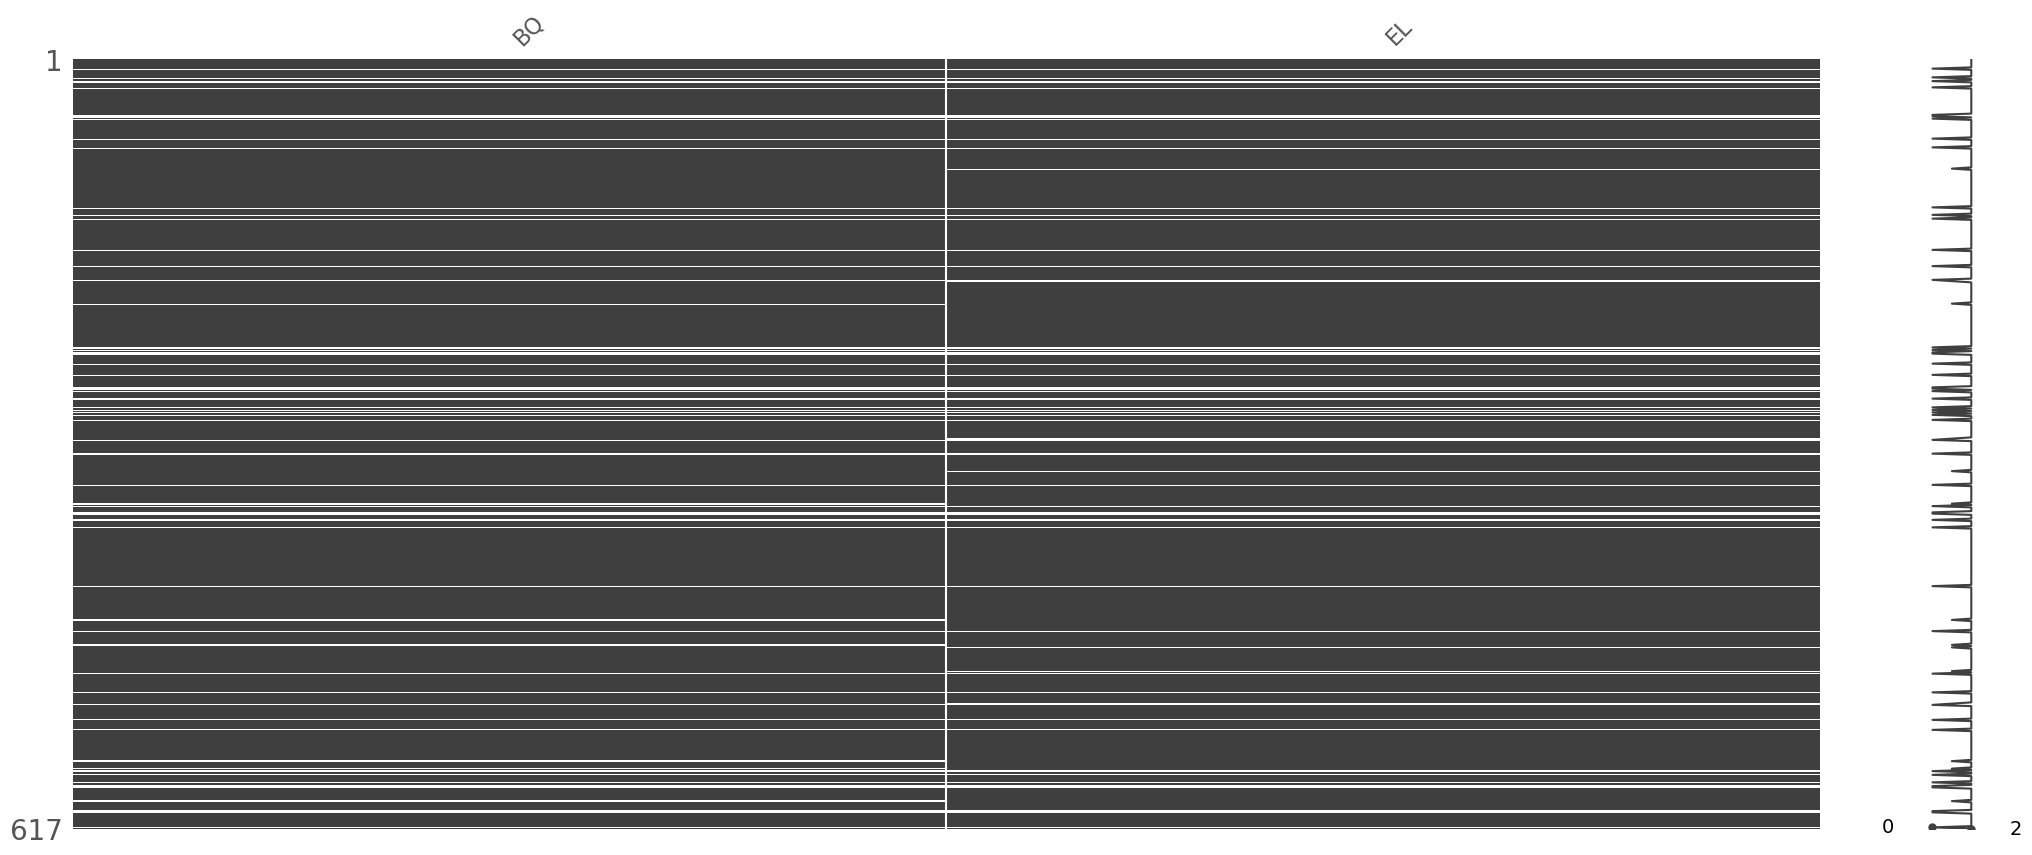

In [16]:
#visualizing missingness
import missingno as msno
msno.matrix(data[['BQ','EL']])
plt.show()

In [17]:
z = data[['BQ','EL']]
sum(z[['BQ']].isna().values == z[['EL']].isna().values)/len(z)

array([0.97730956])

In [18]:
data[['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']].agg(['min','max'])

,BQ,CB,CC,DU,EL,FC,FL,FS,GL
min,1.331155,12.499760,0.176874,0.005518,5.394675,7.534128,0.173229,0.067730,0.001129
max,344.644105,2271.436167,4.103032,161.355315,109.125159,3030.655824,137.932739,31.365763,21.978000


In [19]:
data['BQ'].fillna(data['BQ'].median(),inplace = True)
data['CB'].fillna(data['CB'].median(),inplace = True)
data['CC'].fillna(data['CC'].median(),inplace = True)
data['DU'].fillna(data['DU'].median(),inplace = True)
data['EL'].fillna(data['EL'].median(),inplace = True)
data['FC'].fillna(data['FC'].median(),inplace = True)
data['FL'].fillna(data['FL'].median(),inplace = True)
data['FS'].fillna(data['FS'].median(),inplace = True)
data['GL'].fillna(data['GL'].median(),inplace = True)

In [20]:
data.isna().sum()

Id       0
AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

### EDA

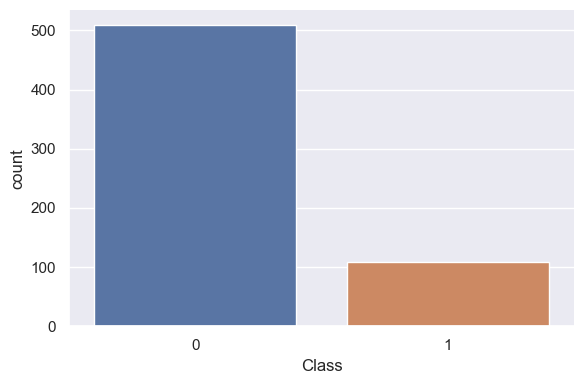

In [21]:
sns.set(style="darkgrid")
sns.catplot(x = 'Class',data = data,kind = 'count',height = 4,aspect = 1.5)

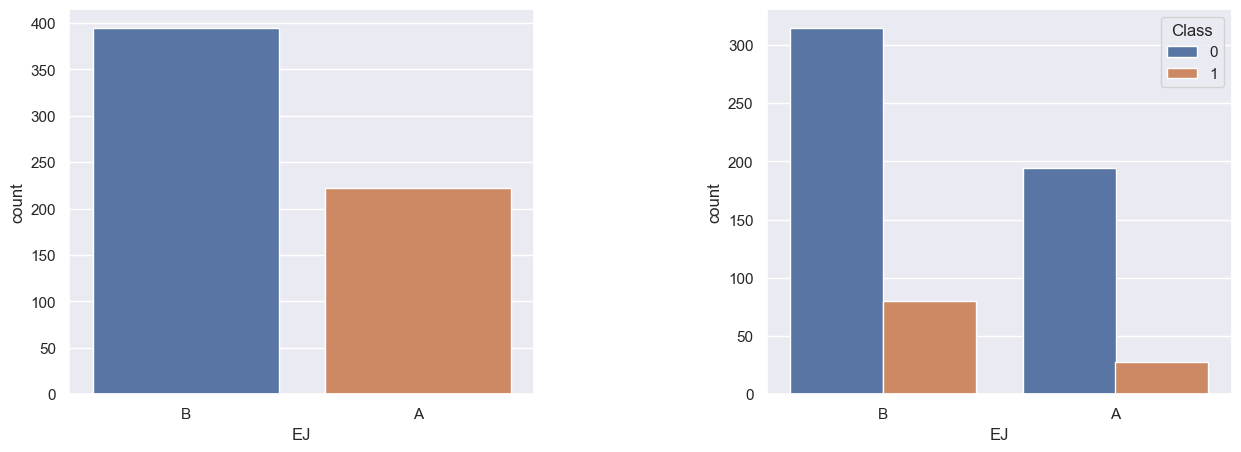

In [22]:
#EJ
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x = 'EJ',data = data,ax= axes[0])
sns.countplot(x = 'EJ',data = data,hue = 'Class',ax=axes[1])

plt.subplots_adjust(wspace=0.5)
plt.show()

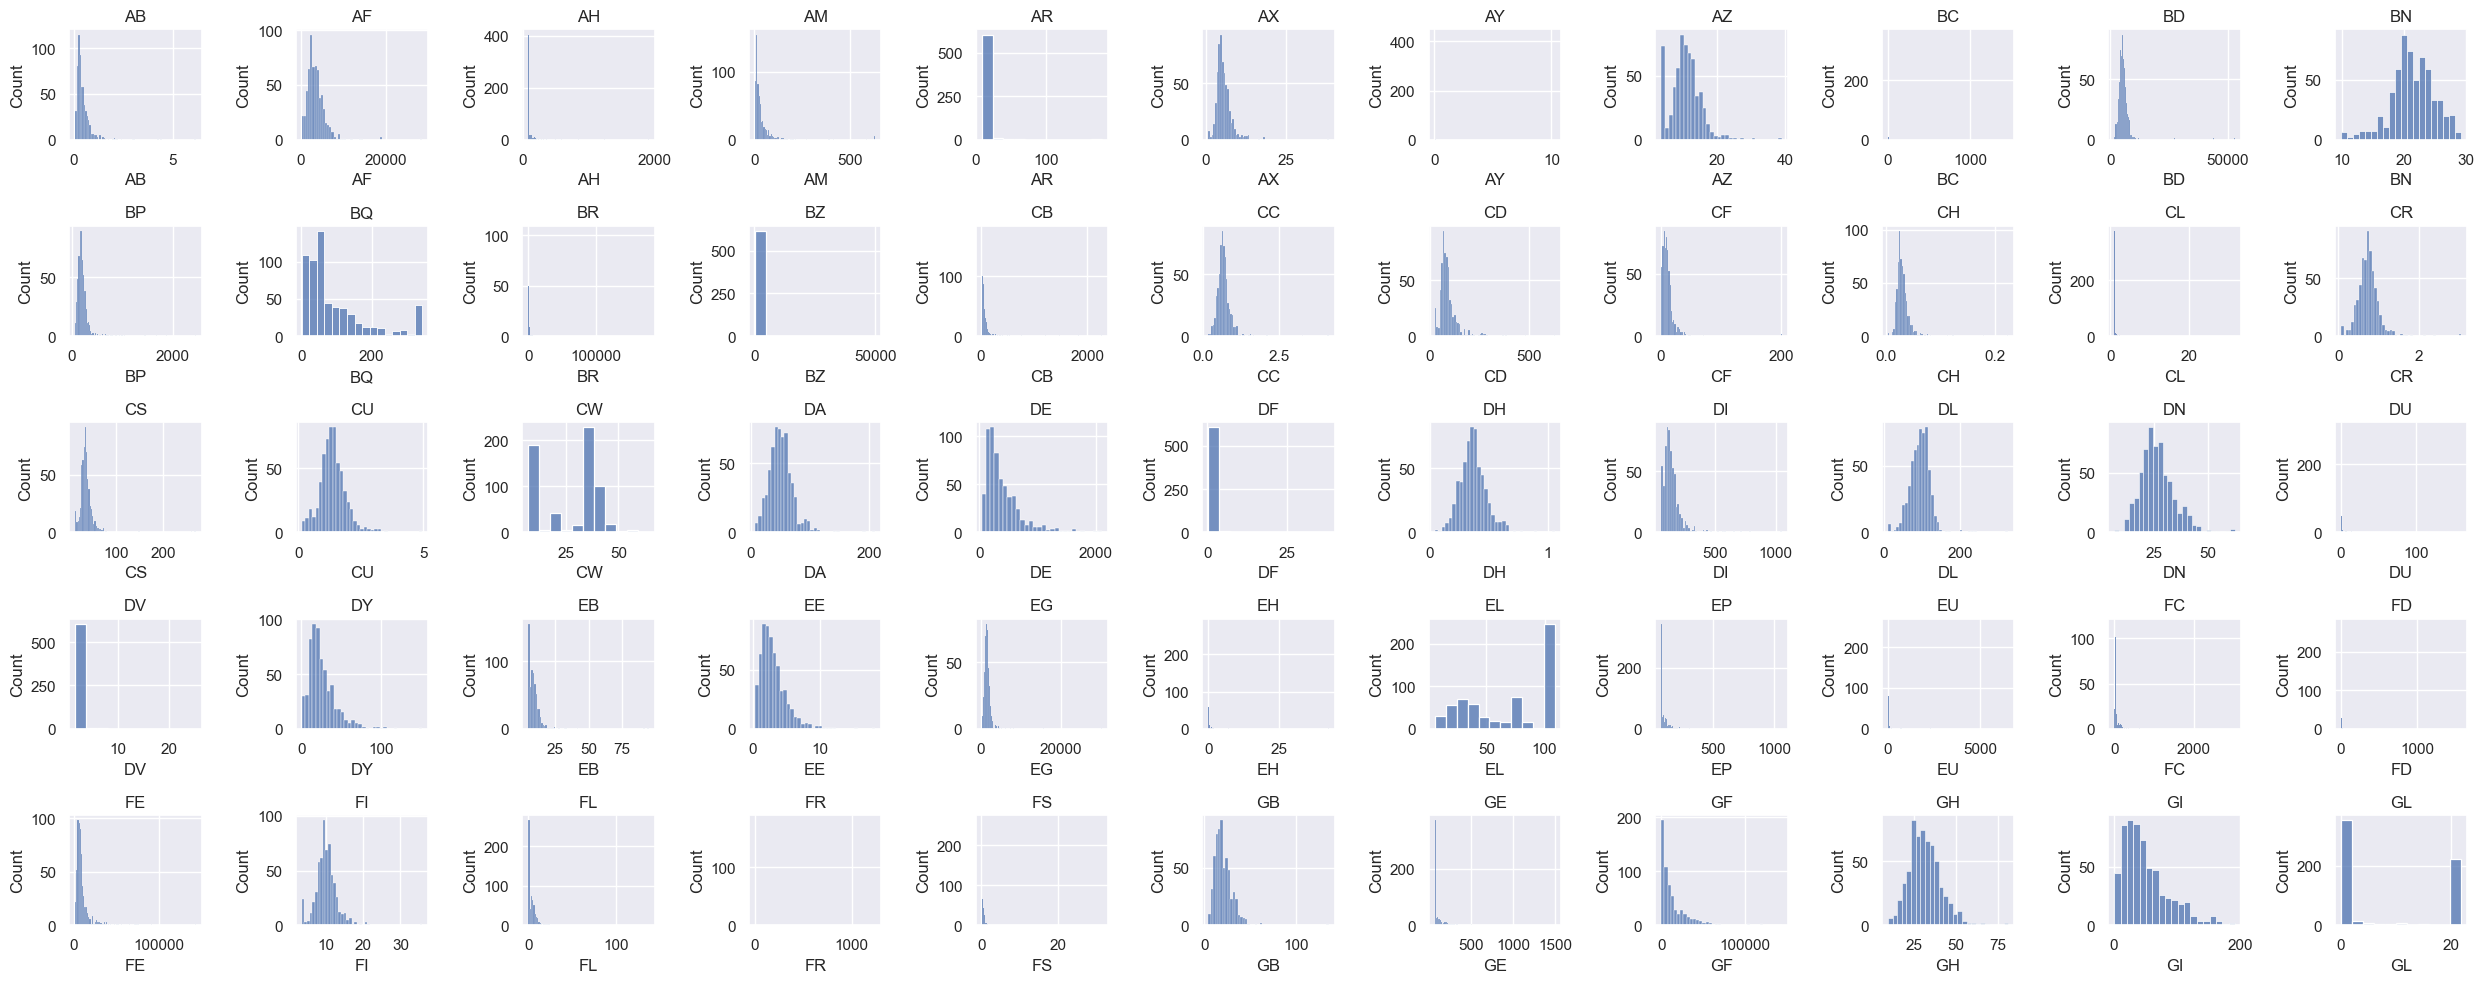

In [23]:
sns.set(style="darkgrid")

# Select only the numerical features from the DataFrame
numerical_features = data.select_dtypes(include='float64')

num_subplots = numerical_features.shape[1]
num_rows = 5
num_cols = 11

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25,10))
axes = axes.flatten()

# Loop through each numerical feature and create the histogram
for i, feature in enumerate(numerical_features.columns):
    ax = axes[i]
    sns.histplot(data[numerical_features.columns[i]], ax=ax)
    ax.set_title(feature)

# Remove empty subplots if necessary
if num_subplots < num_rows * num_cols:
    for j in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the layout and spacing
plt.tight_layout()
plt.show()


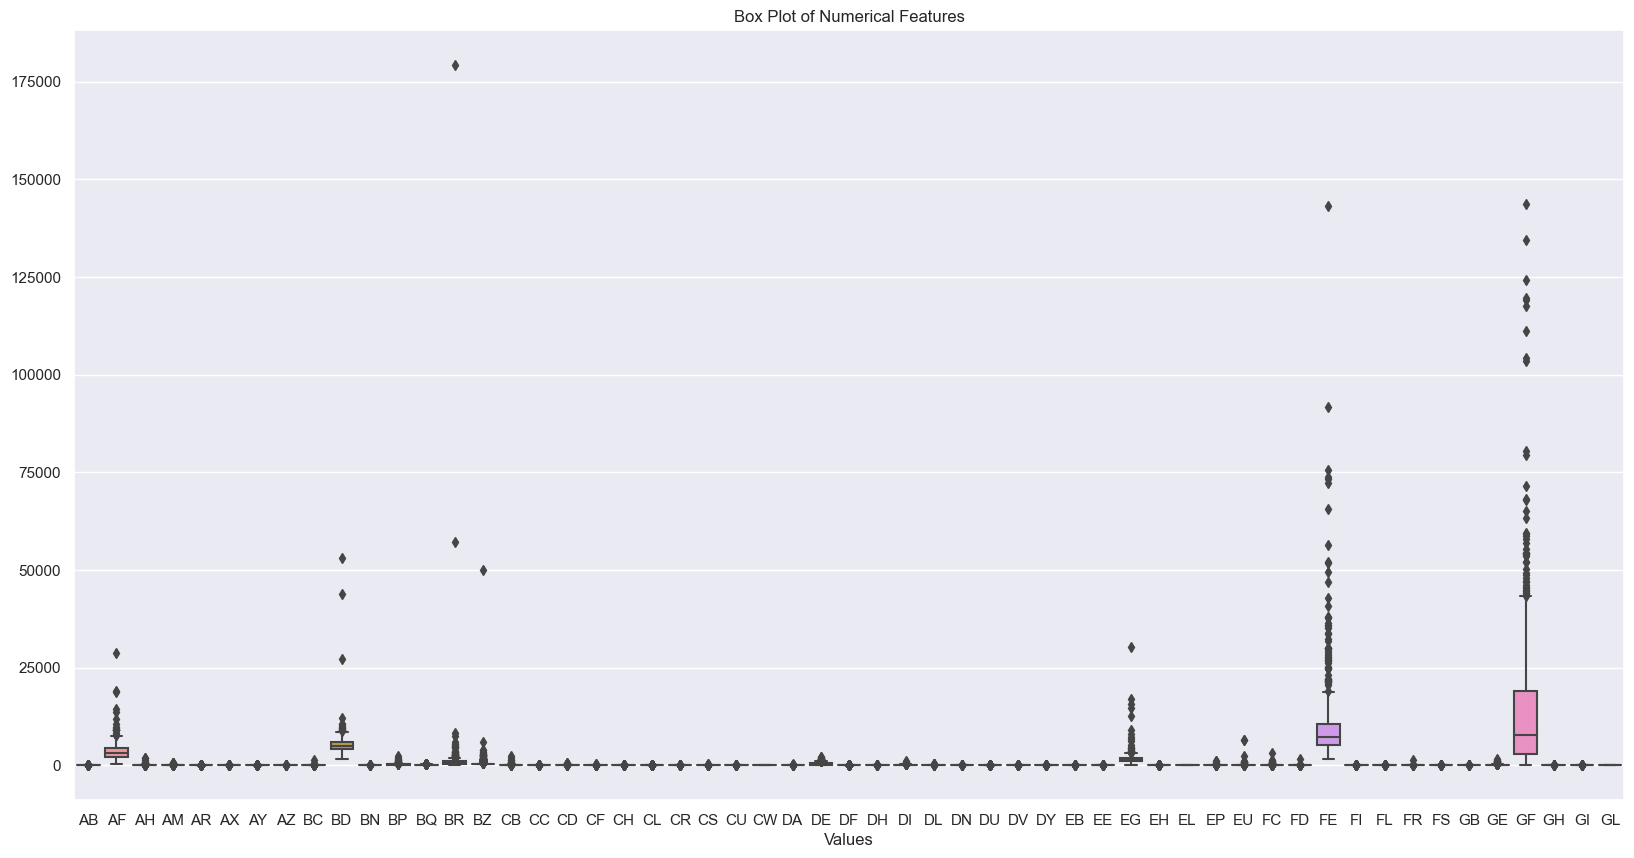

In [24]:
# Select only the numerical features from the DataFrame
numerical_features = data.select_dtypes(include='float64')

# Set the figure size
plt.figure(figsize=(20,10))

# Create the box plot
sns.boxplot(data=numerical_features, orient='v')

# Set the title and labels
plt.title('Box Plot of Numerical Features')
plt.xlabel('Values')

# Show the plot
plt.show()

<Axes: >

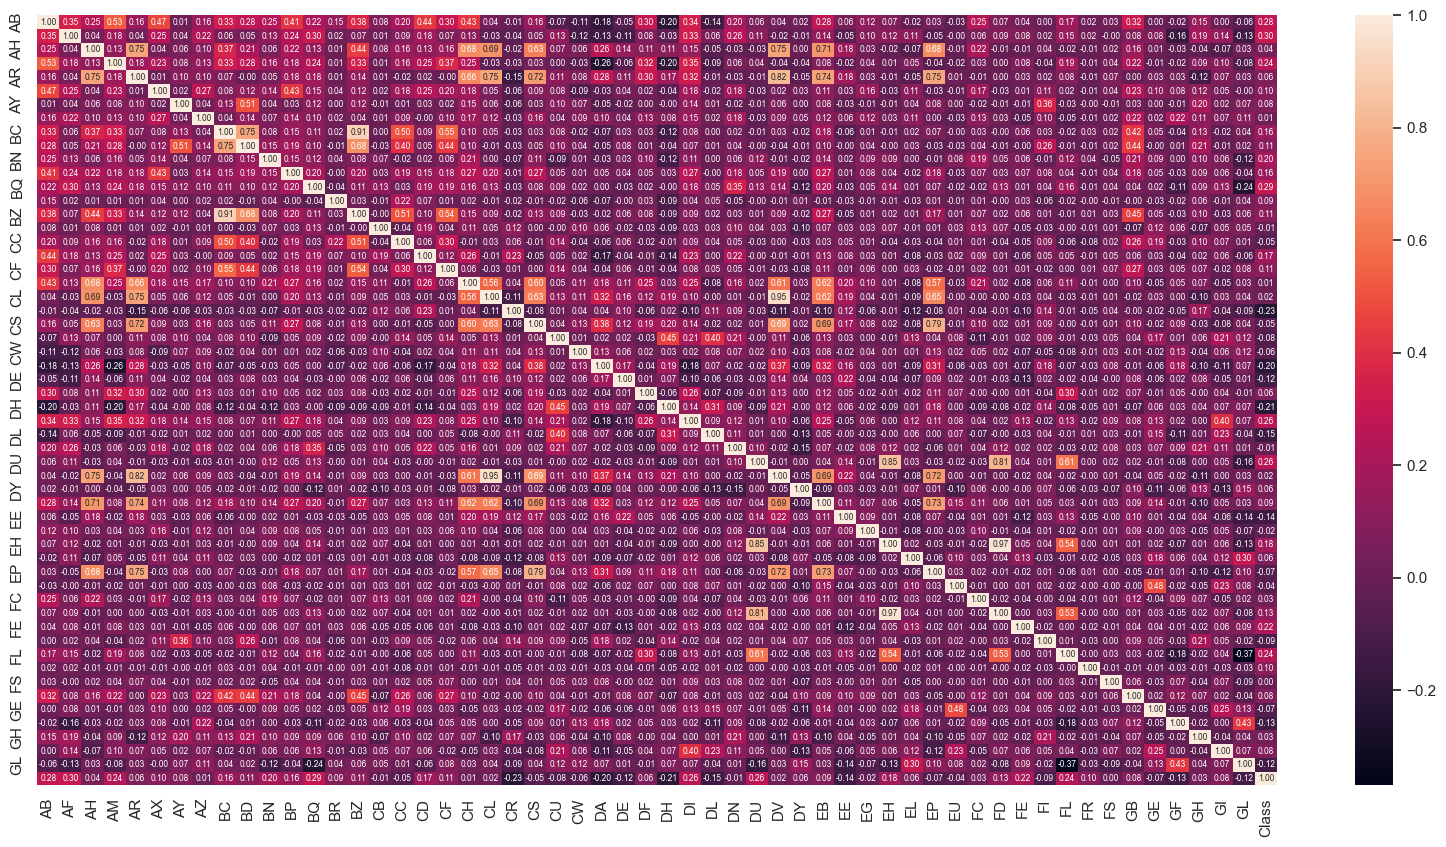

In [25]:
#Heatmap
plt.figure(figsize = (20,10))
numerical_features['Class'] = data['Class'].astype('int')
sns.heatmap(numerical_features.corr(),annot=True, fmt=".2f", annot_kws={"size": 6})

In [26]:
corr_matrix= numerical_features.corr().abs()
# Get the pairs of columns with correlation greater than 0.8
highly_correlated_pairs = []

# Iterate over the columns of the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Print the highly correlated pairs
print("Pairs of columns with correlation > 0.8:")
for pair in highly_correlated_pairs:
    print(pair)

Pairs of columns with correlation > 0.8:
('AR', 'DV')
('BC', 'BZ')
('CL', 'DV')
('DU', 'EH')
('DU', 'FD')
('EH', 'FD')


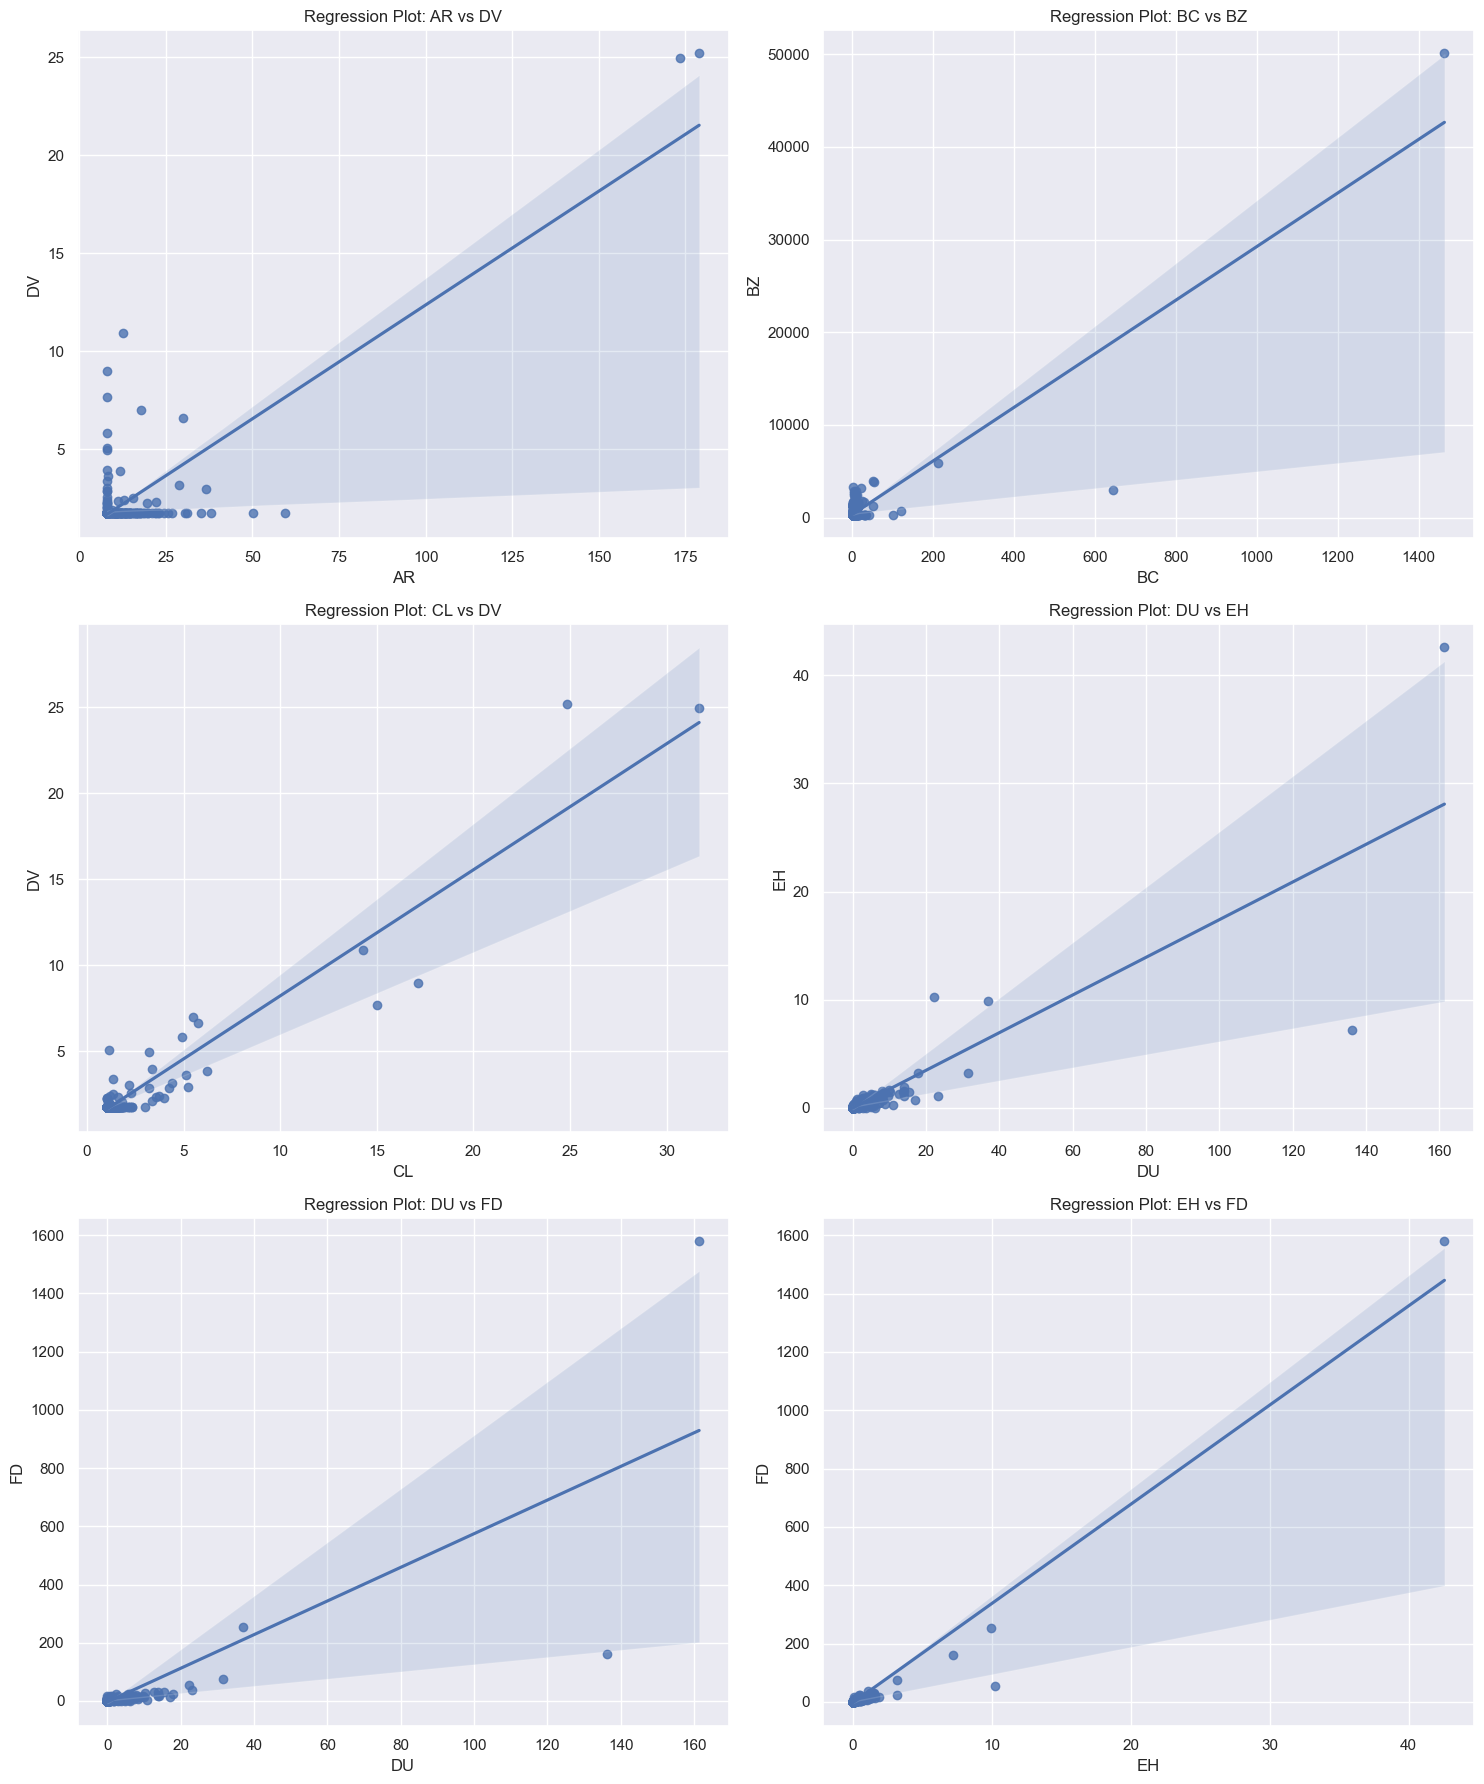

In [27]:
# Determine the number of rows and columns for the subplots grid
num_plots = len(highly_correlated_pairs)
num_cols = 2
num_rows = (num_plots + 1) // 2

# Create subplots with customized figure size and layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Create regplots for each pair of highly correlated columns
for i, pair in enumerate(highly_correlated_pairs):
    column1, column2 = pair
    
    # Select the corresponding axis for the regplot
    ax = axes[i]
    
    # Plot the regplot for the pair of columns
    sns.regplot(data=numerical_features, x=column1, y=column2, ax=ax)
    ax.set_xlabel(column1)
    ax.set_ylabel(column2)
    ax.set_title(f"Regression Plot: {column1} vs {column2}")
    
# Remove any unused subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the regplots
plt.show()

In [28]:
#chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = pd.crosstab(data['Class'],data['EJ'],margins = False) 
#print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[183.14100486 325.85899514]
 [ 38.85899514  69.14100486]]
probability=0.950, critical=3.841, stat=5.229
Dependent (reject H0)
significance=0.050, p=0.022
Dependent (reject H0)


### Preprocessing & Modeling

In [29]:
!pip install xgboost

In [30]:
data.set_index('Id',inplace = True)
data.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [31]:
data['EJ'] = data['EJ'].map({'A':0,'B':1})
data['EJ']

Id
000ff2bfdfe9    1
007255e47698    0
013f2bd269f5    1
043ac50845d5    1
044fb8a146ec    1
               ..
fd3dafe738fd    0
fd895603f071    1
fd8ef6377f76    0
fe1942975e40    1
ffcca4ded3bb    0
Name: EJ, Length: 617, dtype: int64

In [32]:
data['EJ'].value_counts()

1    395
0    222
Name: EJ, dtype: int64

In [33]:
data.dtypes

AB        float64
AF        float64
AH        float64
AM        float64
AR        float64
AX        float64
AY        float64
AZ        float64
BC        float64
BD        float64
BN        float64
BP        float64
BQ        float64
BR        float64
BZ        float64
CB        float64
CC        float64
CD        float64
CF        float64
CH        float64
CL        float64
CR        float64
CS        float64
CU        float64
CW        float64
DA        float64
DE        float64
DF        float64
DH        float64
DI        float64
DL        float64
DN        float64
DU        float64
DV        float64
DY        float64
EB        float64
EE        float64
EG        float64
EH        float64
EJ          int64
EL        float64
EP        float64
EU        float64
FC        float64
FD        float64
FE        float64
FI        float64
FL        float64
FR        float64
FS        float64
GB        float64
GE        float64
GF        float64
GH        float64
GI        float64
GL        

In [34]:
data.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [66]:
data['Class'] = data['Class'].astype('int')
data.dtypes

AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ         int64
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object

In [67]:
# Split the data 
from sklearn.model_selection import train_test_split
X = data.drop(['Class'],axis= 1)
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123,stratify = y)

In [68]:
X_train.shape,y_train.shape

((493, 56), (493,))

In [69]:
X_test.shape,y_test.shape

((124, 56), (124,))

In [70]:
y_train.value_counts()

0    407
1     86
Name: Class, dtype: int64

In [71]:
#Scale the data
from sklearn.preprocessing import StandardScaler
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [72]:
y_train.value_counts()

0    407
1     86
Name: Class, dtype: int64

In [73]:
type(y_train)

pandas.core.series.Series

In [74]:
X_train

array([[-0.11764212, -0.17329782, -0.33789006, ..., -0.42053969,
        -0.29813367, -0.81027769],
       [ 0.02167942, -1.43854495, -0.33789006, ..., -1.58571698,
         2.05776421,  1.31052967],
       [-0.29676981, -0.55009528, -0.33789006, ...,  0.92885998,
         0.13703034, -0.80574691],
       ...,
       [-0.37638212, -1.43854495, -0.33789006, ..., -0.02236901,
        -0.87418124,  1.31052967],
       [-0.37638212, -0.28494571, -0.33789006, ...,  0.32358578,
        -0.37659409, -0.81073109],
       [ 0.29037095,  0.12325718,  0.50464473, ...,  1.99195225,
        -0.89741012, -0.78985497]])

In [75]:
#!pip install --upgrade imbalanced-learn

In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [90]:
X_train_oversampled.shape,y_train_oversampled.shape

((814, 56), (814,))

In [91]:
#calculate precision and recall
def plot_precision_recall_curve(y_test, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()
     

In [92]:
from sklearn import metrics
def plot_roc_curve(y_test, y_pred):
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(10, 8), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [93]:
def balanced_log_loss_manual(y_true, y_pred):
    # y_true: correct labels 0, 1
    # y_pred: predicted probabilities of class=1
    # calculate the number of observations for each class
    y_true = y_train.astype('int')
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    # calculate the weights for each class to balance classes
    w_0 = 1 / N_0
    w_1 = 1 / N_1
    # calculate the predicted probabilities for each class
    p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1
    # calculate the summed log loss for each class
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))
    # calculate the weighted summed logarithmic loss
    # (factgor of 2 included to give same result as LL with balanced input)
    balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
    # return the average log loss
    return balanced_log_loss/(N_0+N_1)

Negative balanced log loss might suggest the following:

* The model's predicted probabilities for the majority class (class 0) are highly confident and close to 0.
* The class imbalance is significantly affecting the computation of the balanced log loss.
* The negative value is an artifact of the way the log loss is weighted and balanced across classes.

While a negative balanced log loss might be mathematically possible due to these factors, it's important to interpret it in context. Negative balanced log loss doesn't change the fundamental interpretation of log loss—it's still a measure of prediction quality, with lower values indicating better predictions. 

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, log_loss, confusion_matrix
scoring_metric_manual = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

#define evaluation procedure
def evaluate_model_manual(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=scoring_metric_manual, cv=cv, n_jobs=-1)
    
    return scores

In [88]:
print(X_train_oversampled.dtype,y_train_oversampled.dtype)
print(X_train_oversampled.shape,y_train_oversampled.shape)

float64 int64
(814, 56) (814,)


/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

>SVM nan (nan)
>KNN nan (nan)


 type: ignore[misc]
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/computation/expressions.py", line 129, in _evaluate_numexpr
    result = _evaluate_standard(op, op_str, a, b)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/computation/expressions.py", line 70, in _evaluate_standard
    return op(a, b)
ValueError: operands could not be broadcast together with shapes (493,) (163,) 

  warnings.warn(
/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/

/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

    return _evaluate(op, op_str, a, b)  # type: ignore[misc]
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/computation/expressions.py", line 129, in _evaluate_numexpr
    result = _evaluate_standard(op, op_str, a, b)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/computation/expressions.py", line 70, in _evaluate_standard
    return op(a, b)
ValueError: operands could not be broadcast together with shapes (493,) (163,) 

  warnings.warn(
/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anacond

/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

>RF nan (nan)


/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

>LogReg nan (nan)


/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/var/folders/9q/5mgnm51d31d1vvlnqq12w8r80000gn/T/ipykernel_27874/660058122.py", line 15, in balanced_log_loss_manual
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/Users/HOME/opt/anaconda/anaconda3/lib/python3.10/site-packages/pandas/c

>XGB nan (nan)


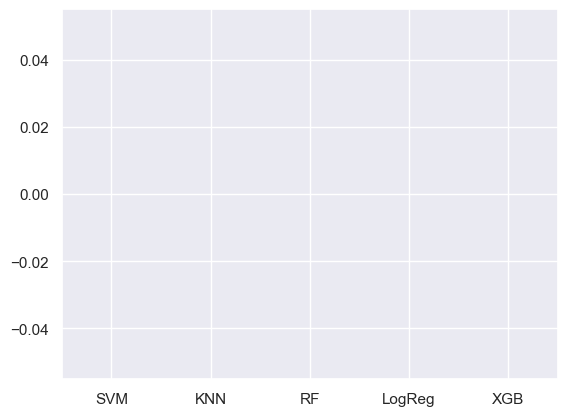

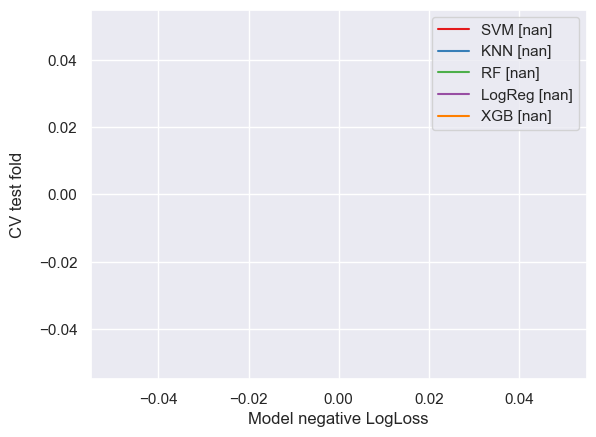

In [96]:
#MANUAL BALANCED LOGLOSS
# define models to test
def get_models():
    models, names = list(), list()
    
    # SVM
    models.append(SVC(gamma='auto',probability=True))
    names.append('SVM')
    
    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    # RF
    models.append(RandomForestClassifier(n_estimators=500))
    names.append('RF')
    
    #LogisticRegression
    models.append(LogisticRegression())
    names.append('LogReg')
    
    #XGB
    models.append(xgb.XGBClassifier(n_estimators = 500))
    names.append('XGB')
    return models, names

# define models
models, names = get_models()
results = list()


# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model_manual(X_train_oversampled, y_train_oversampled, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
    

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

dic = {f'SVM [{round(np.mean(results[0]),6)}]' : [],
       f'KNN [{round(np.mean(results[1]),6)}]' : [],
      f'RF [{round(np.mean(results[2]),6)}]' : [],
      f'LogReg [{round(np.mean(results[3]),6)}]' : [],
      f'XGB [{round(np.mean(results[4]),6)}]' : []}
sns.lineplot(data = dict(zip(dic,results)),
            dashes = False,
            palette = "Set1",marker = "o",
            alpha = 0.5)
plt.xlabel("Model negative LogLoss")
plt.ylabel("CV test fold",labelpad =  10)
plt.show()